<a href="https://colab.research.google.com/github/Creatrohit9/Credit-Card-Default-Prediction-Rohit-Bhadauriya/blob/main/Credit_Card_Default_Prediction_Soumya_Ranjan_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Objective:**


Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by **Credit Card Default.**


> We are all aware what is **credit card**. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.




> **Credit card default** happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.
 

In [ ]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/Data & Resources/default of credit card clients.xls',header = 1)
df = pd.read_excel('/content/drive/MyDrive/3-capston project supervised machine learning using classification  /Copy of default of credit card clients.xls',header = 1)

In [ ]:
df.info()

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1 = male, 2 = female)

* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

So let's begin.

First we will check if we have any null values

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

# **Exploratory Data Analysis**

## **Dependent Variable:**

In [ ]:
#renaming for better convinience
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [ ]:
df['IsDefaulter'].value_counts()

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.




## **Independent Variable:**

### **Categorical  Features**

We have few categorical features in our dataset. Let'Check how they are related with out target class.

**SEX**



*   1 - Male
*   2 - Female


In [ ]:
df['SEX'].value_counts()

**Education**



> 1 = graduate school; 2 = university; 3 = high school; 4 = others

In [ ]:
df['EDUCATION'].value_counts()

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

**Marriage**


> 1 = married; 2 = single; 3 = others

In [ ]:
df['MARRIAGE'].value_counts()

We have few values for 0, which are not determined . So I am adding them in Others category.

In [ ]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

**Plotting our categorical features**

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

In [ ]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:




*   There are more females credit card holder,so no. of defaulter have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Singles.






**Limit Balance**

In [ ]:
df['LIMIT_BAL'].max()

In [ ]:
df['LIMIT_BAL'].min()

In [ ]:
df['LIMIT_BAL'].describe()

In [ ]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [ ]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

**AGE**

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [ ]:
df['AGE'].value_counts()

In [ ]:
df['AGE']=df['AGE'].astype('int')

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [ ]:
df.groupby('IsDefaulter')['AGE'].mean()

In [ ]:
df = df.astype('int')

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

**Bill Amount**

In [ ]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

In [ ]:
sns.pairplot(data = bill_amnt_df)

**History payment status**

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

**Paid Amount**

In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

In [ ]:
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [ ]:
df.shape

### **As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
x_smote

In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

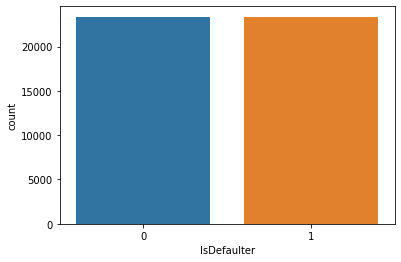

In [ ]:
sns.countplot('IsDefaulter', data = balance_df)

In [ ]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,9086,493989,1,1,1,48,0,0,0,0,0,0,7845,6220,5347,3862,3992,9392,4242,3606,1884,2015,7414,897,1
46724,3325,30000,1,2,2,34,3,3,2,2,0,0,32110,31330,30871,29778,29686,29778,0,471,3,1141,1096,552,1
46725,29561,10000,1,2,2,35,0,0,0,0,0,1,8280,8827,9287,9617,9860,9718,1248,1148,1150,921,110,405,1
46726,29281,210000,1,1,1,38,0,-1,-1,-1,-1,-1,262,262,262,262,262,262,262,262,262,262,262,262,1


# Feature Engineering

In [ ]:
df_fr = balance_df.copy()

In [ ]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [ ]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.665811
Name: Payement_Value, dtype: float64

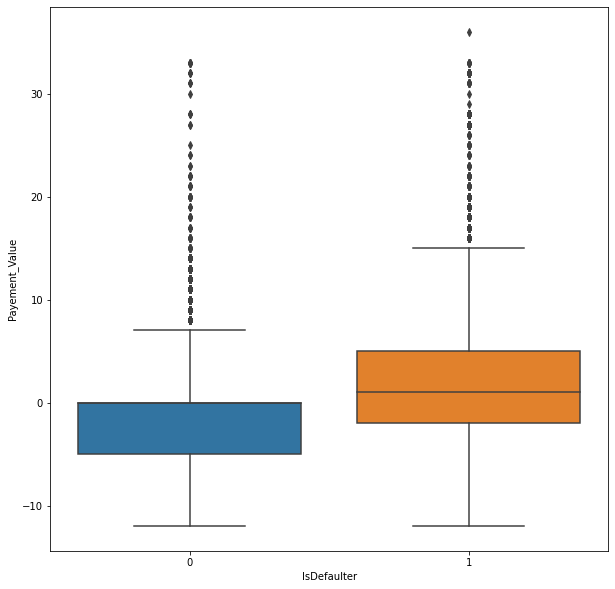

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [ ]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    195776.301489
Name: Dues, dtype: float64

In [ ]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
 
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [ ]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3])

In [ ]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620


# One Hot Encoding

In [ ]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [ ]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,0,1,1,0,0


In [ ]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [ ]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,...,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [ ]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,...,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_fr.drop('ID',axis = 1, inplace = True)

In [ ]:
df_fr.to_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/Final_df.csv')

FileNotFoundError: ignored

In [ ]:
#df_fr.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Final_df.csv')

In [ ]:
df_fr = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/Final_df.csv')


In [ ]:
#df_fr = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Final_df.csv')

In [ ]:
df_fr.head()

In [ ]:
df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

# Implementing Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [ ]:
df_log_reg = df_fr.copy()

In [ ]:
df_log_reg.head()

In [ ]:
X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter']

In [ ]:
columns = X.columns

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_params_

In [ ]:
grid_lr_clf.best_score_

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:

plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

In [ ]:
'''
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()'''

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

# Implementing SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

In [ ]:
optimal_SVC_clf = grid_clf.best_estimator_

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.best_score_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

In [ ]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

We can see from above results that we are getting  around 80% train accuracy and 78% for test accuracy which is not bad. But f1- score is 76% approx, so there might be more ground for improvement. 

In [ ]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1

In [ ]:
import torch

In [ ]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
torch.save(optimal_SVC_clf, path)

In [ ]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}"
optimal_SVC_clf = torch.load(path)

In [ ]:
optimal_SVC_clf

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

In [ ]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing Decision Tree

Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

In [ ]:
grid_DTC_clf.best_score_

In [ ]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
grid_DTC_clf.best_params_

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

# Implementing RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

We can see from above results that we are getting  around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.

In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

In [ ]:
grid_rf_clf.best_score_

In [ ]:
grid_rf_clf.best_params_

In [ ]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

In [ ]:
len(optimal_rf_clf.feature_importances_)

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
torch.save(optimal_rf_clf, path)

In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}"
optimal_rf_clf = torch.load(path)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [ ]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing XGBoost 

In [ ]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

# Applying XGBoost 

In [ ]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [ ]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

In [ ]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [ ]:
len(train_class_preds_probs)

In [ ]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
test_class_preds_probs[:20]

In [ ]:
test_class_preds[:20]

In [ ]:
len(y_train)

In [ ]:
len(train_class_preds)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

In [ ]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

# Hyperparameter Tuning

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

In [ ]:
 gsearch1.best_score_

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

In [ ]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

In [ ]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
torch.save(optimal_xgb, path)

In [ ]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}"
optimal_xgb = torch.load(path)

# Evaluating the models

In [ ]:
recall_score

In [ ]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [ ]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

# Plotting ROC AUC for all the models

In [ ]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
result_table

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()